In [1]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot 

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################


c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


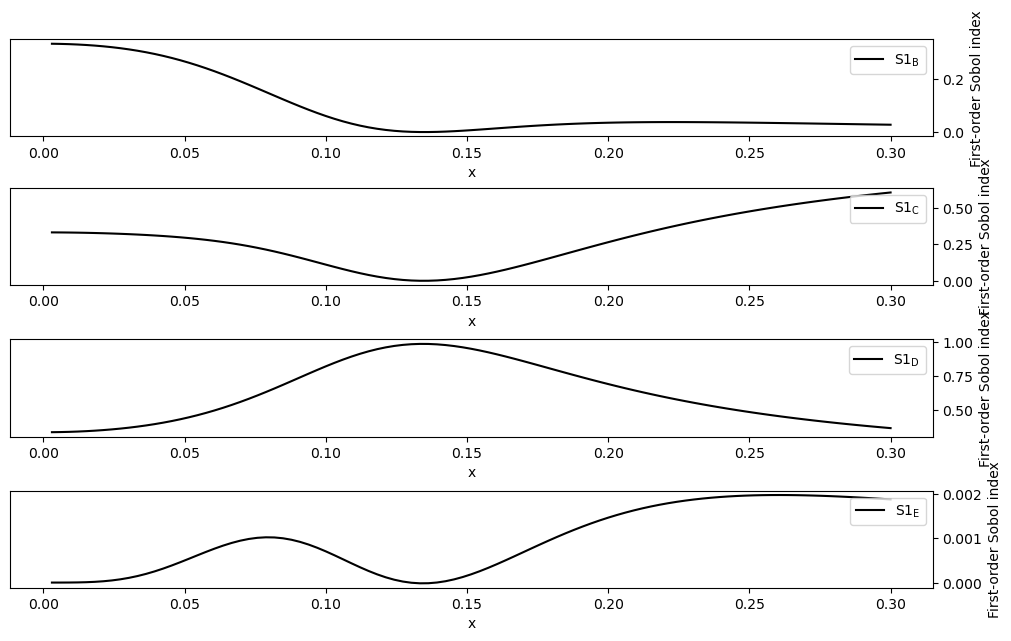

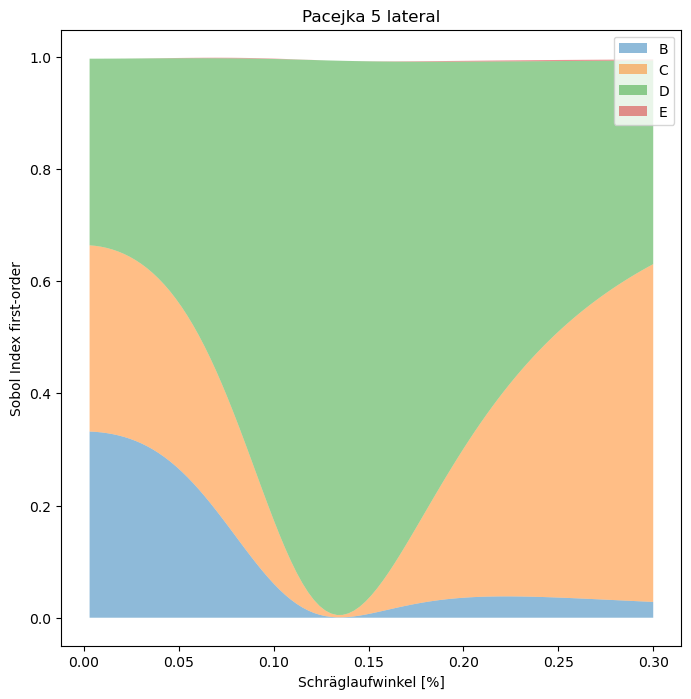

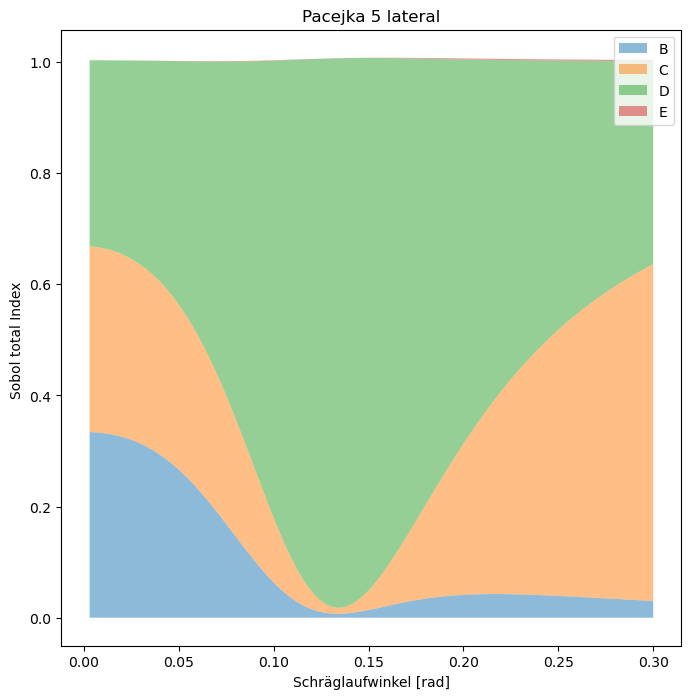

In [7]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_lat(alpha,B,C,D,E):

    Fy= 4000 *D * np.sin(C * np.arctan(B * alpha - E * (B*alpha - np.arctan(B * alpha)))) 
    
    return Fy
params_SA_Fy = [-9.06434405 , 1.60162373, -1.72069169, -0.80265574]
s=0.1
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[-9.06434405 *(1+s),-9.06434405*(1-s)], [1.60162373*(1-s), 1.60162373*(1+s)], [-1.72069169*(1+s), -1.72069169*(1-s)], [-0.80265574*(1+s), -0.80265574*(1-s)]],
})

alpha = np.linspace(0,0.3,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, alpha=alpha):
    y = np.zeros((ab.shape[0], alpha.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_lat(alpha,B,C,D,E)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(alpha, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(8,8))
plt.fill_between(alpha,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(alpha,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(alpha,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(alpha,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(8,8))
plt.fill_between(alpha,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(alpha,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(alpha,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(alpha,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()




0.3341921190191146
0.33410973124475746
0.3348468977045495


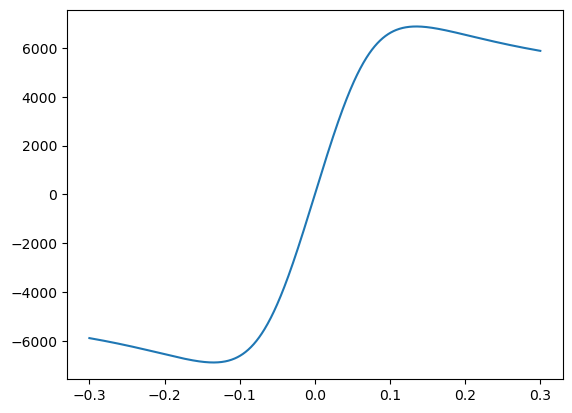

In [8]:
def Pacejka5_lat_pa(alpha,B,C,D,E):

    Fy= 4000 *D * np.sin(C * np.arctan(B * alpha - E * (B*alpha - np.arctan(B * alpha)))) 
    
    return Fy
params_SA_Fy = [-9.06434405 , 1.60162373, -1.72069169, -0.80265574]

Slip = np.linspace(-0.3,0.3,1000)
Fy_spax = Pacejka5_lat_pa(Slip,*params_SA_Fy)
plt.plot(Slip,Fy_spax)

print(STs_B[1])
print(STs_C[1])
print(STs_D[1])

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


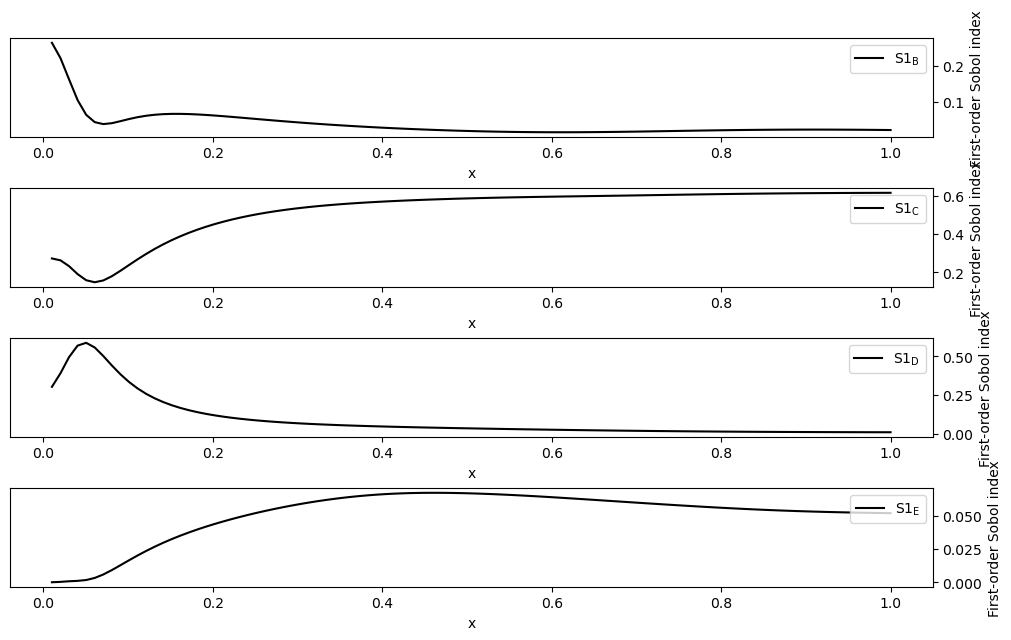

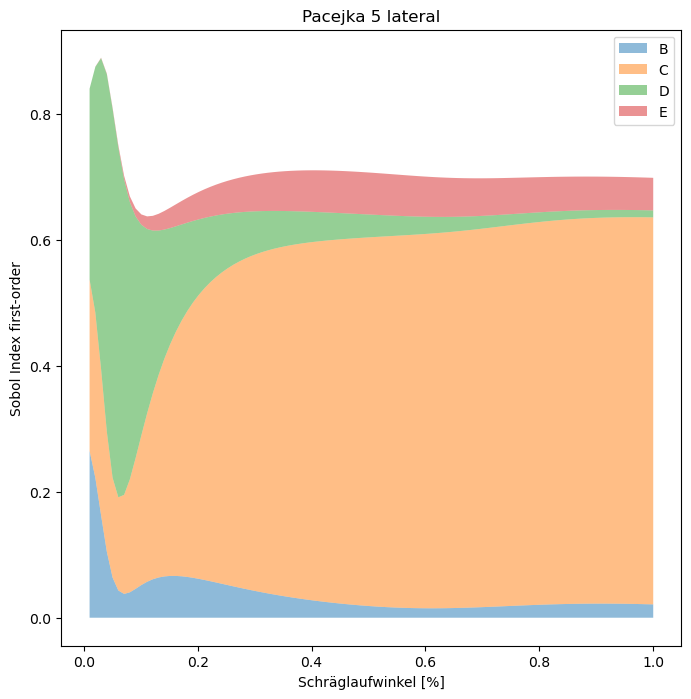

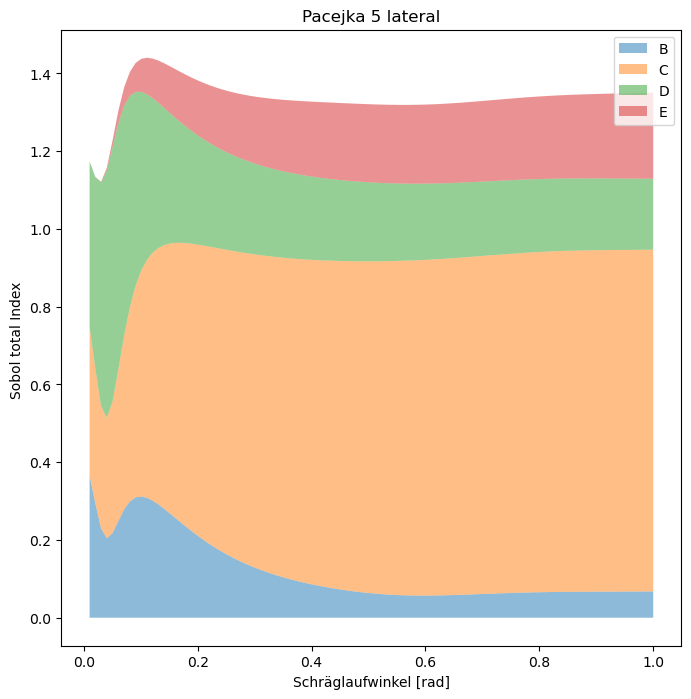

In [28]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_long_pa(SL,B,C,D,E):

    Fx= 4000 * D * np.sin(C * np.arctan(B * SL -E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fy = [17.04378049 , 1.99996234 , 1.82504605 , 0.62177794]
s=0.8
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[17.04378049 *(1-s),17.04378049*(1+s)], [1.99996234*(1-s), 1.99996234*(1+s)], [1.82504605*(1-s), 1.82504605*(1+s)], [0.62177794*(1-s), 0.62177794*(1+s)]],
})

SL = np.linspace(0,1,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_long_pa(SL,B,C,D,E)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SL,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(SL,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SL,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(SL,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()




0.3118261098161859
0.3318248303105204
0.3592763872775898


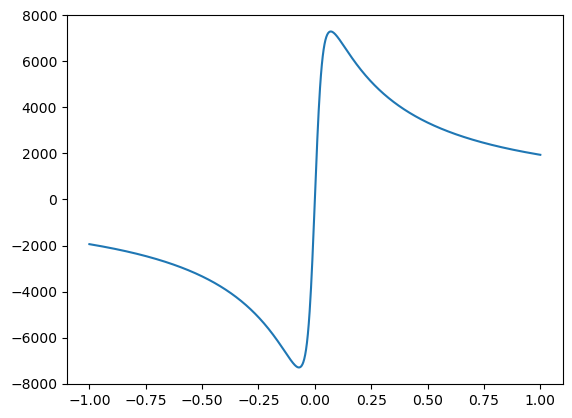

In [14]:
def Pacejka5_long_pa(SL,B,C,D,E):

    Fx= 4000 * D * np.sin(C * np.arctan(B * SL -E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fy = [17.04378049 , 1.99996234 , 1.82504605 , 0.62177794]

Slip = np.linspace(-1,1,1000)
Fy_spax = Pacejka5_long_pa(Slip,*params_SA_Fy)
plt.plot(Slip,Fy_spax)

print(STs_B[1])
print(STs_C[1])
print(STs_D[1])

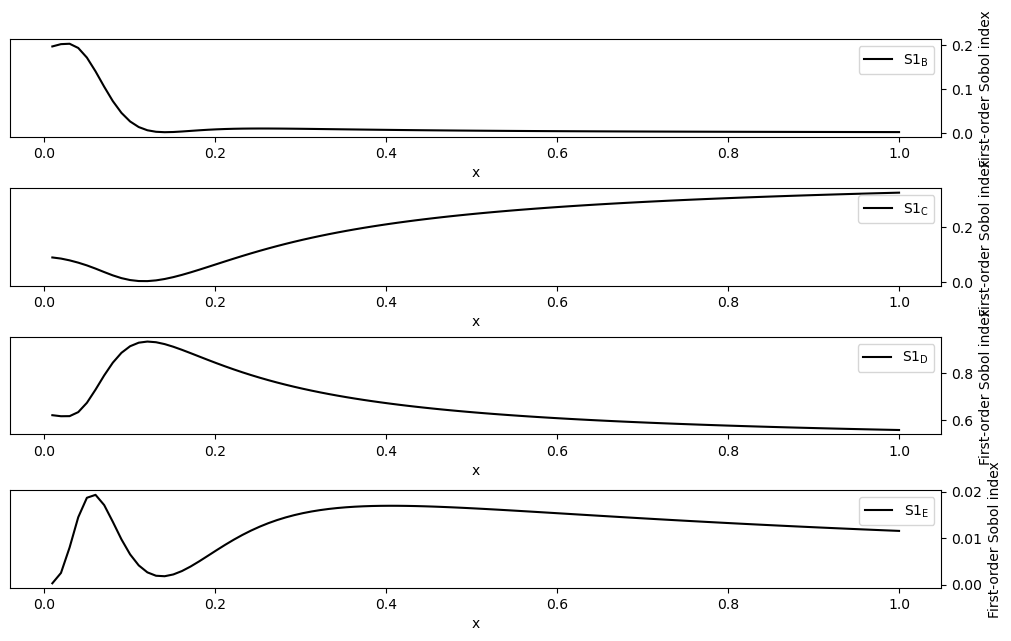

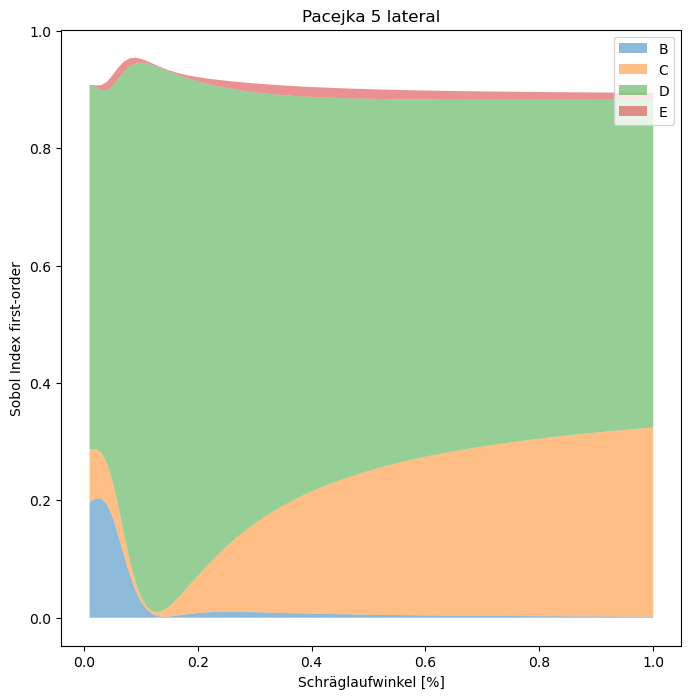

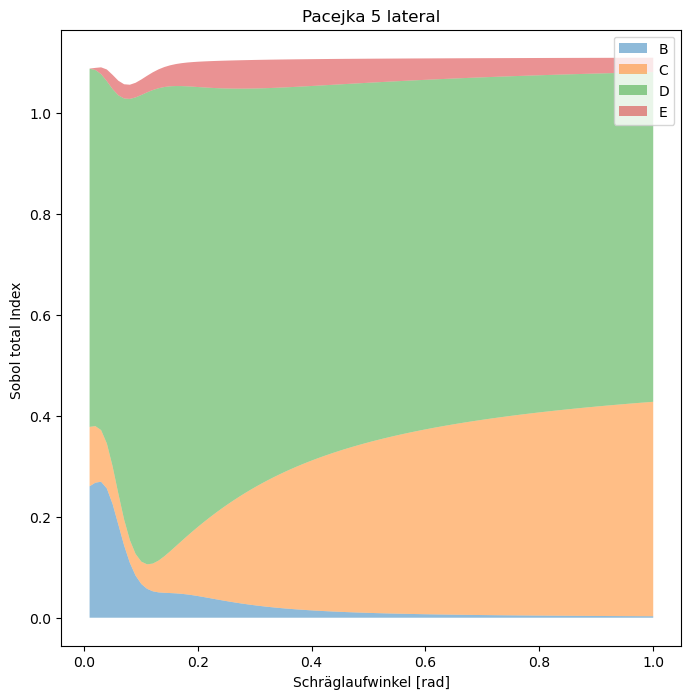

In [17]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_long_pa(SL,B,C,D,E):

    Fx= 4000 * D * np.sin(C * np.arctan(B * SL -E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fy = [17.04378049 , 1.99996234 , 1.82504605 , 0.62177794]
s=0.1
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[4,12], [1, 2], [0.1, 1.9], [-10, 1]],
})

SL = np.linspace(0,1,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_long_pa(SL,B,C,D,E)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SL,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(SL,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SL,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(SL,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()




c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


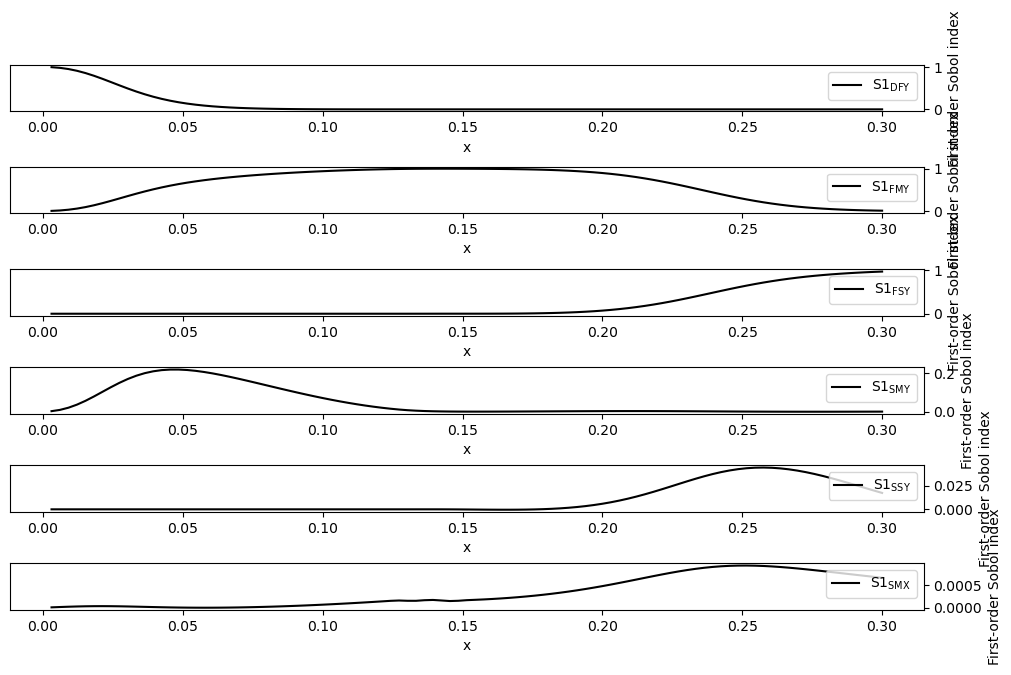

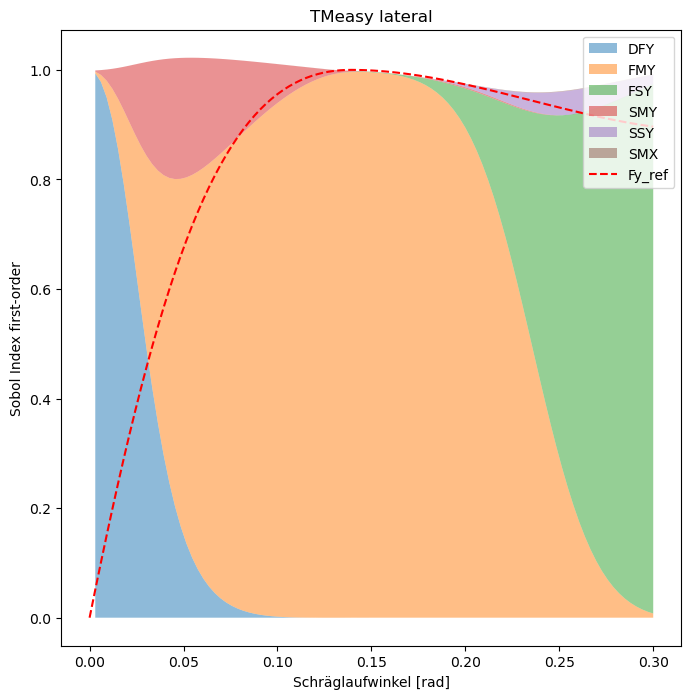

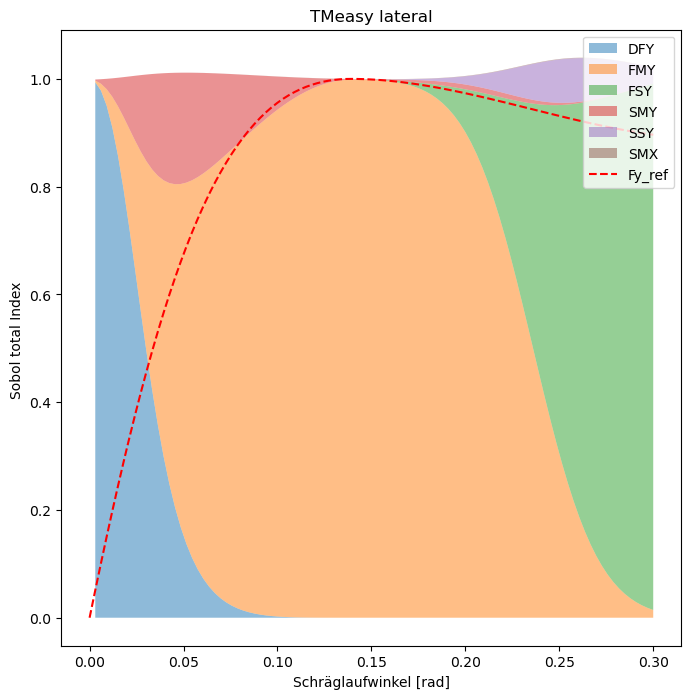

In [44]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm
#function
SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fy_params_alt = [1.17442284e+05 ,6.96692988e+03 ,6.19030406e+03, 1.40228962e-01,3.33896904e-01 ,3.52710315e+00]
F_ref = tm.calcFY(SX, SY,*Fy_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 6,
    'names': ['DFY', 'FMY', 'FSY', 'SMY', 'SSY','SMX'],
    'bounds': [[1.17442284e+05 *(1-s),1.17442284e+05*(1+s)], [6.96692988e+03*(1-s), 6.96692988e+03*(1+s)], 
               [6.19030406e+03*(1-s), 6.19030406e+03*(1+s)], [1.40228962e-01*(1-s), 1.40228962e-01*(1+s)],
               [3.33896904e-01*(1-s), 3.33896904e-01*(1+s)], [3.52710315e+00*(1-s), 3.52710315e+00*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (DFY, FMY, FSY, SMY, SSY,SMX) in enumerate(ab):
        y[i,:] = tm.calcFY(SX, SY, DFY, FMY, FSY, SMY, SSY,SMX)

    return y

(
sp.sample_sobol(2**8) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(6, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
#DFY, FMY, FSY, SMY, SSY,SMX
S1s_DFY  = np.array(S1s[:,0])
S1s_FMY  = np.array(S1s[:,1])
S1s_FSY  = np.array(S1s[:,2])
S1s_SMY  = np.array(S1s[:,3])
S1s_SSY  = np.array(S1s[:,4])
S1s_SMX  = np.array(S1s[:,5])

S1s_FMY_plt = np.array([x+y for x,y in zip(S1s_DFY,S1s_FMY)])
S1s_FSY_plt = np.array([x+y for x,y in zip(S1s_FMY_plt,S1s_FSY)])
S1s_SMY_plt = np.array([x+y for x,y in zip(S1s_FSY_plt,S1s_SMY)])
S1s_SSY_plt = np.array([x+y for x,y in zip(S1s_SMY_plt,S1s_SSY)])
S1s_SMX_plt = np.array([x+y for x,y in zip(S1s_SSY_plt,S1s_SMX)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SY,S1s_DFY,0, alpha=0.5, label = 'DFY') #alpha = deckkraft farbe
plt.fill_between(SY,S1s_DFY,S1s_FMY_plt, where = (S1s_FMY_plt > S1s_DFY), alpha=0.5, label = 'FMY')
plt.fill_between(SY,S1s_FMY_plt,S1s_FSY_plt, where = (S1s_FSY_plt > S1s_FMY_plt), alpha=0.5, label = 'FSY')
plt.fill_between(SY,S1s_FSY_plt,S1s_SMY_plt, where = (S1s_SMY_plt > S1s_FSY_plt), alpha=0.5, label = 'SMY')
plt.fill_between(SY,S1s_SMY_plt,S1s_SSY_plt, where = (S1s_SSY_plt > S1s_SMY_plt), alpha=0.5, label = 'SSY')
plt.fill_between(SY,S1s_SSY_plt,S1s_SMX_plt, where = (S1s_SMX_plt > S1s_SSY_plt), alpha=0.5, label = 'SMX')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol Index first-order')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.title('TMeasy lateral')
plt.legend(loc='upper right')
plt.show()

STs_DFY  = np.array(STs[:,0])
STs_FMY  = np.array(STs[:,1])
STs_FSY  = np.array(STs[:,2])
STs_SMY  = np.array(STs[:,3])
STs_SSY  = np.array(STs[:,4])
STs_SMX  = np.array(STs[:,5])

STs_FMY_plt = np.array([x+y for x,y in zip(STs_DFY,STs_FMY)])
STs_FSY_plt = np.array([x+y for x,y in zip(STs_FMY_plt,STs_FSY)])
STs_SMY_plt = np.array([x+y for x,y in zip(STs_FSY_plt,STs_SMY)])
STs_SSY_plt = np.array([x+y for x,y in zip(STs_SMY_plt,STs_SSY)])
STs_SMX_plt = np.array([x+y for x,y in zip(STs_SSY_plt,STs_SMX)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SY,STs_DFY,0, alpha=0.5, label = 'DFY') #alpha = deckkraft farbe
plt.fill_between(SY,STs_DFY,STs_FMY_plt, where = (STs_FMY_plt > STs_DFY), alpha=0.5, label = 'FMY')
plt.fill_between(SY,STs_FMY_plt,STs_FSY_plt, where = (STs_FSY_plt > STs_FMY_plt), alpha=0.5, label = 'FSY')
plt.fill_between(SY,STs_FSY_plt,STs_SMY_plt, where = (STs_SMY_plt > STs_FSY_plt), alpha=0.5, label = 'SMY')
plt.fill_between(SY,STs_SMY_plt,STs_SSY_plt, where = (STs_SSY_plt > STs_SMY_plt), alpha=0.5, label = 'SSY')
plt.fill_between(SY,STs_SSY_plt,STs_SMX_plt, where = (STs_SMX_plt > STs_SSY_plt), alpha=0.5, label = 'SMX')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('TMeasy lateral')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.legend(loc='upper right')
plt.show()




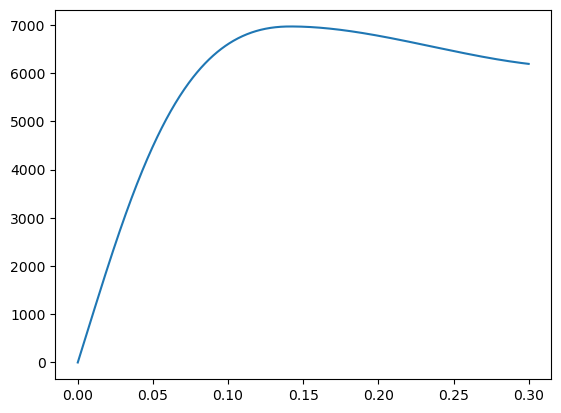

In [36]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm

SX = np.linspace(-1,1,1000)
SY = np.linspace(0,0.3,1000)
Fy_params_alt = [1.17442284e+05 ,6.96692988e+03 ,6.19030406e+03, 1.40228962e-01,3.33896904e-01 ,3.52710315e+00]
F = tm.calcFY(SX, SY, *Fy_params_alt)
plt.plot(SY,F)

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


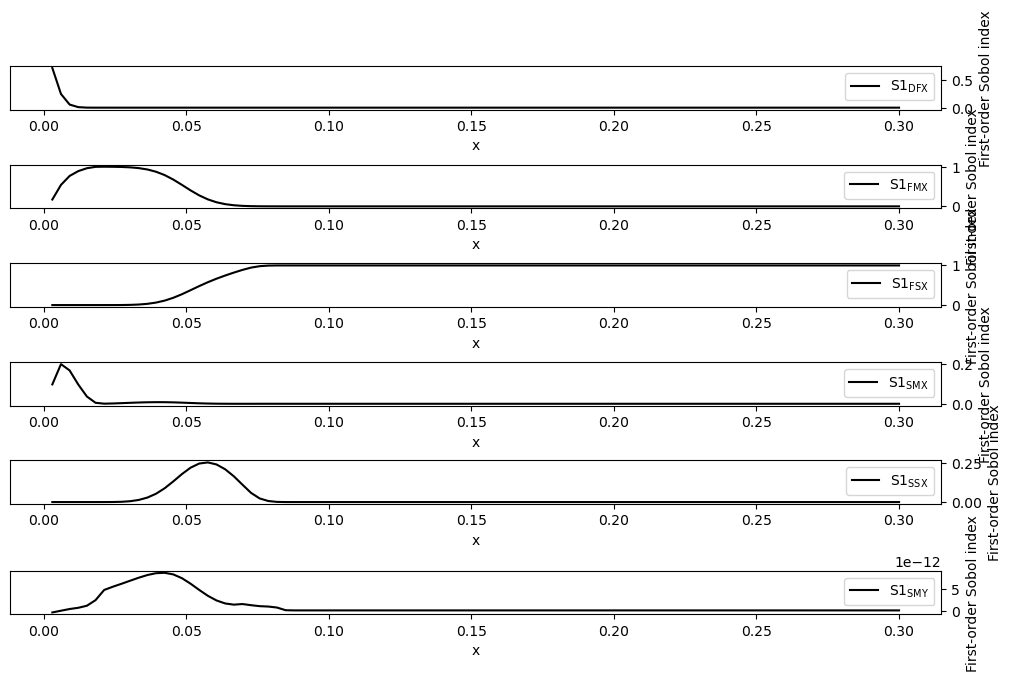

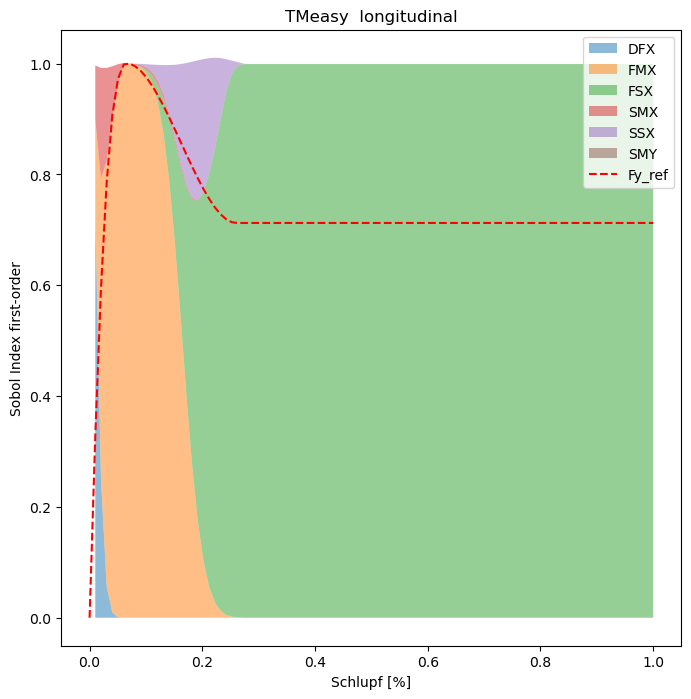

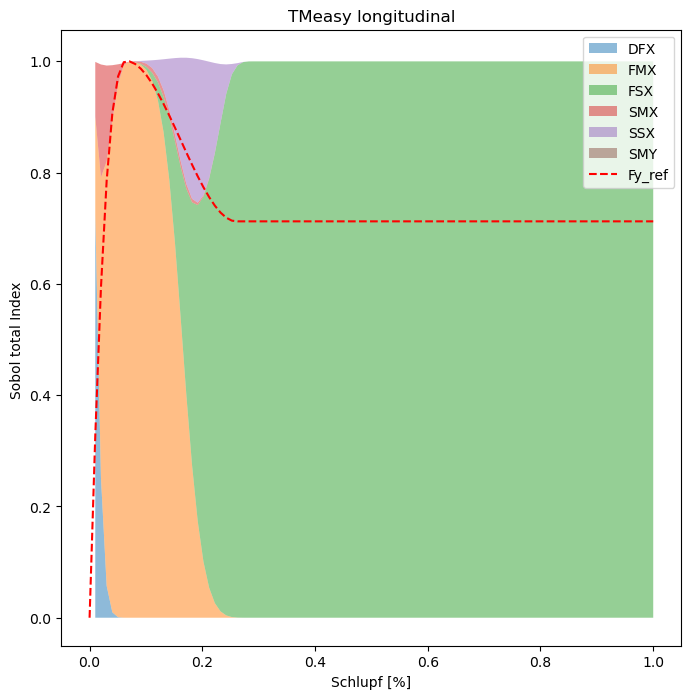

In [47]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm
#function
SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fx_params_alt = [2.53974515e+05, 7.39199255e+03, 5.26261106e+03, 6.49997821e-02,
 2.59983609e-01, 1.13984715e+03]
F_ref = tm.calcFx(SX, SY,*Fx_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 6,
    'names': ['DFX', 'FMX', 'FSX', 'SMX','SSX', 'SMY'],
    'bounds': [[2.53974515e+05 *(1-s),2.53974515e+05*(1+s)], [7.39199255e+03*(1-s), 7.39199255e+03*(1+s)], 
               [5.26261106e+03*(1-s), 5.26261106e+03*(1+s)], [6.49997821e-02*(1-s), 6.49997821e-02*(1+s)],
               [2.59983609e-01*(1-s), 2.59983609e-01*(1+s)], [1.13984715e+03*(1-s), 1.13984715e+03*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SX=SX):
    y = np.zeros((ab.shape[0], SX.shape[0]))
    for i, (DFX, FMX, FSX, SMX,SSX, SMY) in enumerate(ab):
        y[i,:] = tm.calcFx( SX, SY, DFX, FMX, FSX, SMX,SSX, SMY)

    return y

(
sp.sample_sobol(2**8) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(6, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
#DFX, FMX, FSX, SMX,SSX, SMY
S1s_DFX  = np.array(S1s[:,0])
S1s_FMX  = np.array(S1s[:,1])
S1s_FSX  = np.array(S1s[:,2])
S1s_SMX  = np.array(S1s[:,3])
S1s_SSX  = np.array(S1s[:,4])
S1s_SMY  = np.array(S1s[:,5])

S1s_FMX_plt = np.array([x+y for x,y in zip(S1s_DFX,S1s_FMX)])
S1s_FSX_plt = np.array([x+y for x,y in zip(S1s_FMX_plt,S1s_FSX)])
S1s_SMX_plt = np.array([x+y for x,y in zip(S1s_FSX_plt,S1s_SMX)])
S1s_SSX_plt = np.array([x+y for x,y in zip(S1s_SMX_plt,S1s_SSX)])
S1s_SMY_plt = np.array([x+y for x,y in zip(S1s_SSX_plt,S1s_SMY)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SX,S1s_DFX,0, alpha=0.5, label = 'DFX') #alpha = deckkraft farbe
plt.fill_between(SX,S1s_DFX,S1s_FMX_plt, where = (S1s_FMX_plt > S1s_DFX), alpha=0.5, label = 'FMX')
plt.fill_between(SX,S1s_FMX_plt,S1s_FSX_plt, where = (S1s_FSX_plt > S1s_FMX_plt), alpha=0.5, label = 'FSX')
plt.fill_between(SX,S1s_FSX_plt,S1s_SMX_plt, where = (S1s_SMX_plt > S1s_FSX_plt), alpha=0.5, label = 'SMX')
plt.fill_between(SX,S1s_SMX_plt,S1s_SSX_plt, where = (S1s_SSX_plt > S1s_SMX_plt), alpha=0.5, label = 'SSX')
plt.fill_between(SX,S1s_SSX_plt,S1s_SMY_plt, where = (S1s_SMY_plt > S1s_SSX_plt), alpha=0.5, label = 'SMY')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol Index first-order')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fx_ref')
plt.title('TMeasy  longitudinal')
plt.legend(loc='upper right')
plt.show()

STs_DFX  = np.array(STs[:,0])
STs_FMX  = np.array(STs[:,1])
STs_FSX  = np.array(STs[:,2])
STs_SMX  = np.array(STs[:,3])
STs_SSX  = np.array(STs[:,4])
STs_SMY  = np.array(STs[:,5])

STs_FMX_plt = np.array([x+y for x,y in zip(STs_DFX,STs_FMX)])
STs_FSX_plt = np.array([x+y for x,y in zip(STs_FMX_plt,STs_FSX)])
STs_SMX_plt = np.array([x+y for x,y in zip(STs_FSX_plt,STs_SMX)])
STs_SSX_plt = np.array([x+y for x,y in zip(STs_SMX_plt,STs_SSX)])
STs_SMY_plt = np.array([x+y for x,y in zip(STs_SSX_plt,STs_SMY)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SX,STs_DFX,0, alpha=0.5, label = 'DFX') #alpha = deckkraft farbe
plt.fill_between(SX,STs_DFX,STs_FMX_plt, where = (STs_FMX_plt > STs_DFX), alpha=0.5, label = 'FMX')
plt.fill_between(SX,STs_FMX_plt,STs_FSX_plt, where = (STs_FSX_plt > STs_FMX_plt), alpha=0.5, label = 'FSX')
plt.fill_between(SX,STs_FSX_plt,STs_SMX_plt, where = (STs_SMX_plt > STs_FSX_plt), alpha=0.5, label = 'SMX')
plt.fill_between(SX,STs_SMX_plt,STs_SSX_plt, where = (STs_SSX_plt > STs_SMX_plt), alpha=0.5, label = 'SSX')
plt.fill_between(SX,STs_SSX_plt,STs_SMY_plt, where = (STs_SMY_plt > STs_SSX_plt), alpha=0.5, label = 'SMY')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol total Index ')
plt.title('TMeasy longitudinal')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fx_ref')
plt.legend(loc='upper right')
plt.show()




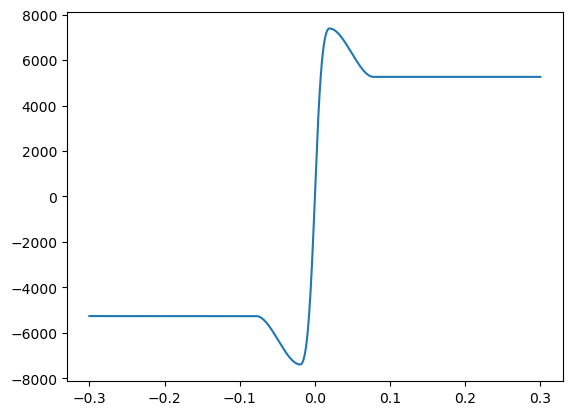

In [43]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm

SX = np.linspace(-1,1,1000)
SY = np.linspace(-0.3,0.3,1000)
Fx_params_alt = [2.53974515e+05, 7.39199255e+03, 5.26261106e+03, 6.49997821e-02,
 2.59983609e-01, 1.13984715e+03]
F = tm.calcFx(SX, SY, *Fy_params_alt)
plt.plot(SY,F)

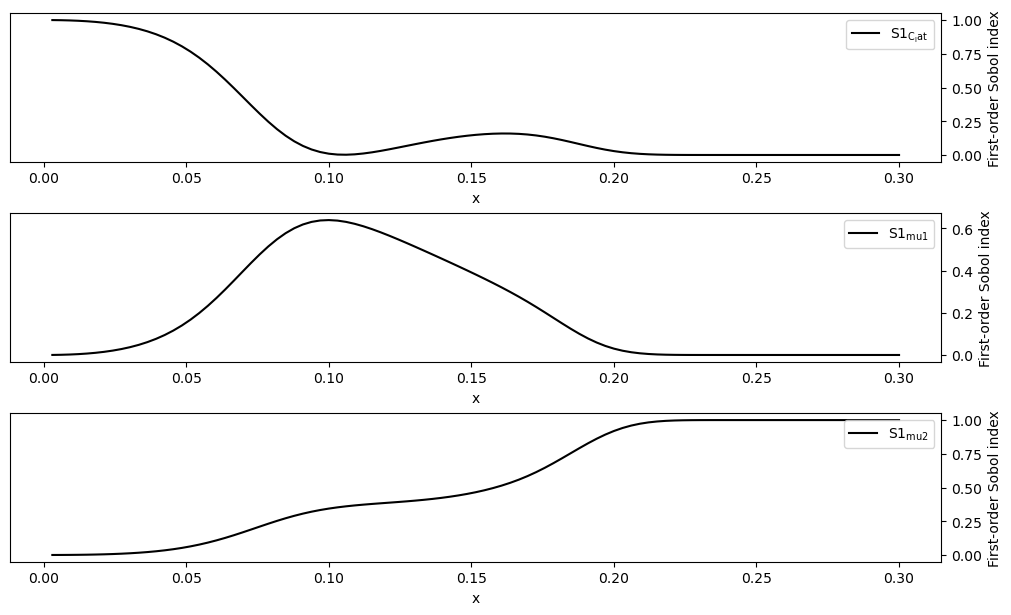

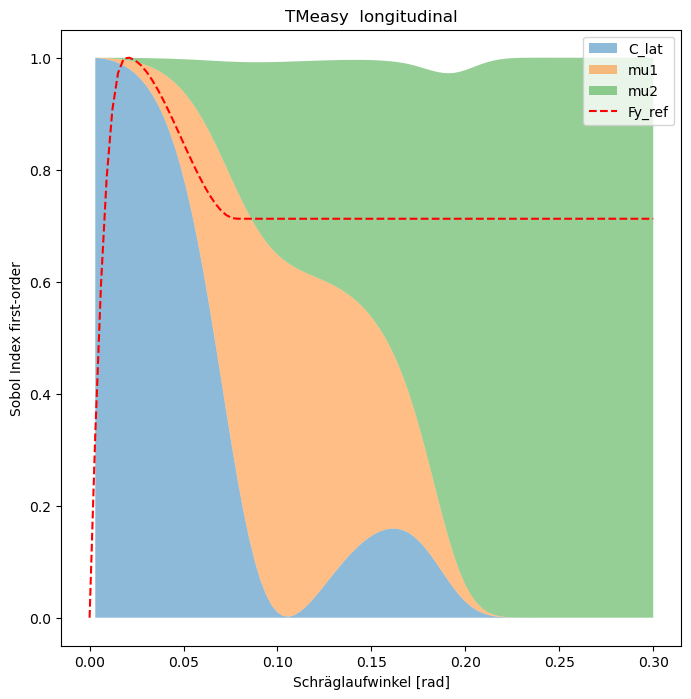

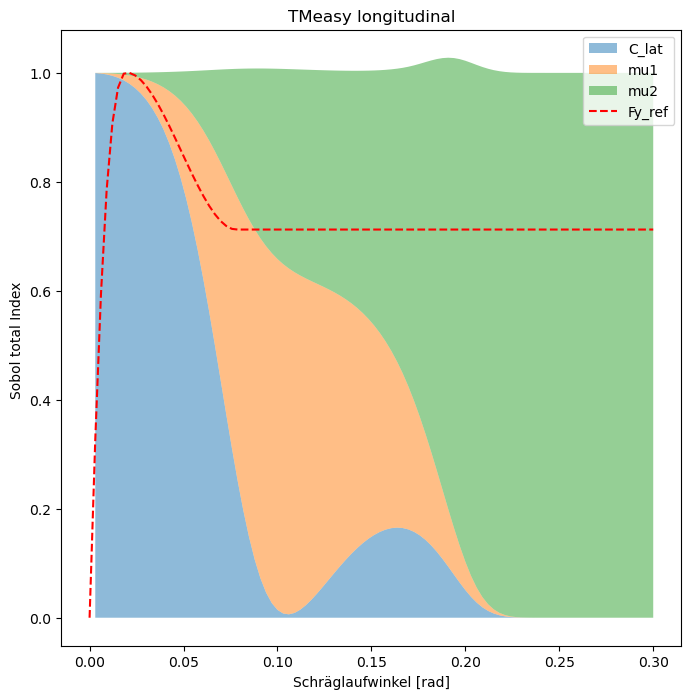

In [55]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import fiala as fi

SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fx_params_alt = [-1.42366152e+05, -2.43832630e+00, -1.27692615e+00]
F = fi.fiala_lat(SY,4000,*Fx_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['C_lat','mu1','mu2'],
    'bounds': [[-1.42366152e+05 *(1+s),-1.42366152e+05*(1-s)], [-2.43832630e+00*(1+s), -2.43832630e+00*(1-s)], 
               [-1.27692615e+00*(1+s), -1.27692615e+00*(1-s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (C_lat,mu1,mu2) in enumerate(ab):
        y[i,:] = fi.fiala_lat(SY,4000,C_lat,mu1,mu2)

    return y

(
sp.sample_sobol(2**13) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
# C_lat,mu1,mu2
S1s_C_lat  = np.array(S1s[:,0])
S1s_mu1  = np.array(S1s[:,1])
S1s_mu2  = np.array(S1s[:,2])


S1s_mu1_plt = np.array([x+y for x,y in zip(S1s_C_lat,S1s_mu1)])
S1s_mu2_plt = np.array([x+y for x,y in zip(S1s_mu1_plt,S1s_mu2)])


plt.figure(2, figsize=(8,8))
plt.fill_between(SY,S1s_C_lat,0, alpha=0.5, label = 'C_lat') #alpha = deckkraft farbe
plt.fill_between(SY,S1s_C_lat,S1s_mu1_plt, where = (S1s_mu1_plt > S1s_C_lat), alpha=0.5, label = 'mu1')
plt.fill_between(SY,S1s_mu1_plt,S1s_mu2_plt, where = (S1s_mu2_plt > S1s_mu1_plt), alpha=0.5, label = 'mu2')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol Index first-order')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.title('Fiala lateral')
plt.legend(loc='upper right')
plt.show()

STs_C_lat  = np.array(STs[:,0])
STs_mu1  = np.array(STs[:,1])
STs_mu2  = np.array(STs[:,2])

STs_mu1_plt = np.array([x+y for x,y in zip(STs_C_lat,STs_mu1)])
STs_mu2_plt = np.array([x+y for x,y in zip(STs_mu1_plt,STs_mu2)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SY,STs_C_lat,0, alpha=0.5, label = 'C_lat') #alpha = deckkraft farbe
plt.fill_between(SY,STs_C_lat,STs_mu1_plt, where = (STs_mu1_plt > STs_C_lat), alpha=0.5, label = 'mu1')
plt.fill_between(SY,STs_mu1_plt,STs_mu2_plt, where = (STs_mu2_plt > STs_mu1_plt), alpha=0.5, label = 'mu2')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Fiala lateral')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.legend(loc='upper right')
plt.show()




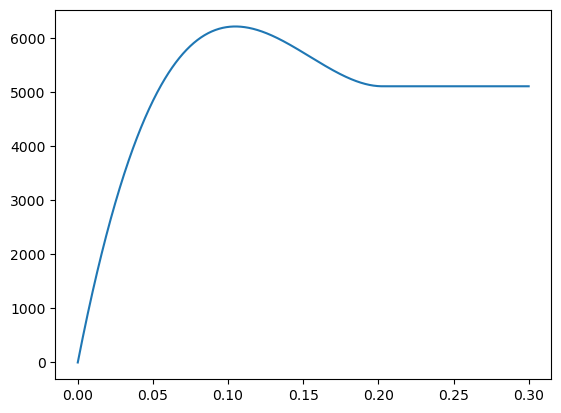

In [49]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import fiala as fi

SX = np.linspace(0,1,1000)
SY = np.linspace(0,0.3,1000)
Fx_params_alt = [-1.42366152e+05, -2.43832630e+00, -1.27692615e+00]
F = fi.fiala_lat(SY,4000,*Fx_params_alt)
plt.plot(SY,F)

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


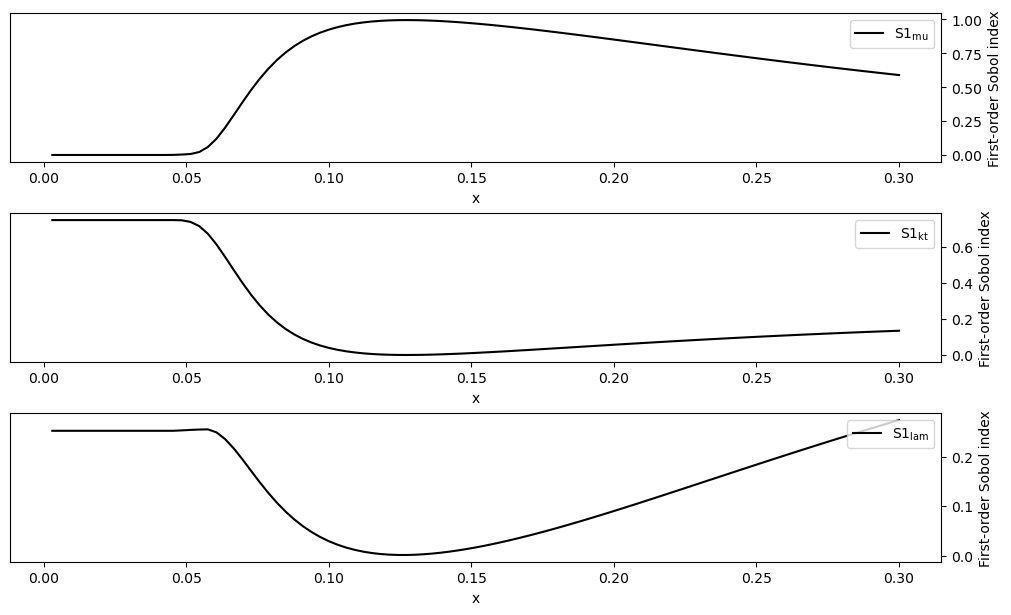

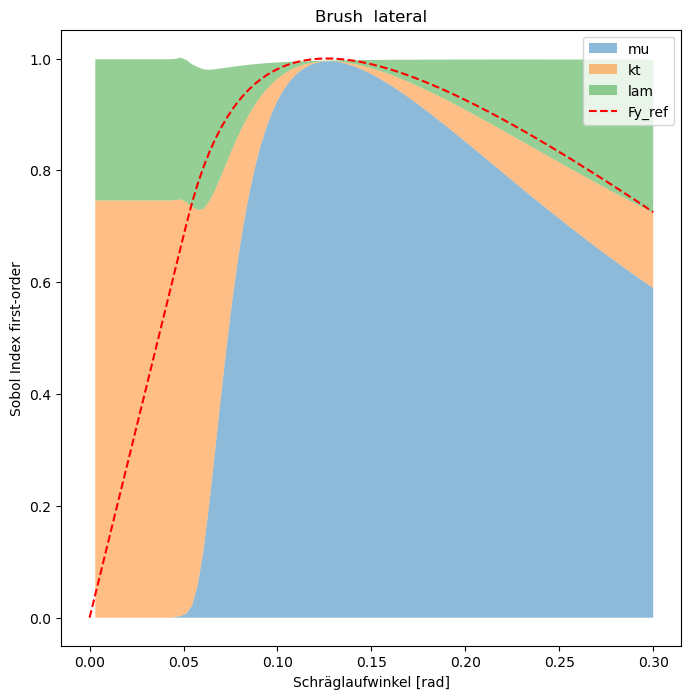

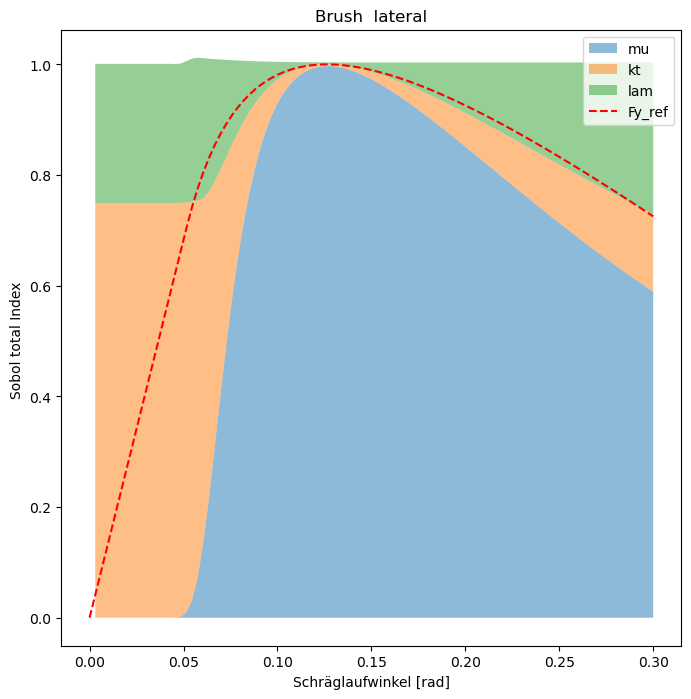

In [63]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Brush as br

SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fy_params_alt = [1.58991258e+00, 1.05121281e+06, 5.74790914e-02]
F_ref = br.brush_lat(SY, 4000 ,*Fy_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 3,
    'names': [ 'mu', 'kt', 'lam'],
    'bounds': [[1.58991258e+00 *(1-s),1.58991258e+00*(1+s)], [1.05121281e+06*(1-s), 1.05121281e+06*(1+s)], 
               [5.74790914e-02*(1-s), 5.74790914e-02*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (mu, kt, lam) in enumerate(ab):
        y[i,:] = br.brush_lat(SY, 4000 ,mu, kt, lam)

    return y

(
sp.sample_sobol(2**8) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
# mu, kt, lam
S1s_mu  = np.array(S1s[:,0])
S1s_kt  = np.array(S1s[:,1])
S1s_lam  = np.array(S1s[:,2])

S1s_kt_plt = np.array([x+y for x,y in zip(S1s_mu,S1s_kt)])
S1s_lam_plt = np.array([x+y for x,y in zip(S1s_kt_plt,S1s_lam)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SY,S1s_mu,0, alpha=0.5, label = 'mu') #alpha = deckkraft farbe
plt.fill_between(SY,S1s_mu,S1s_kt_plt, where = (S1s_kt_plt > S1s_mu), alpha=0.5, label = 'kt')
plt.fill_between(SY,S1s_kt_plt,S1s_lam_plt, where = (S1s_lam_plt > S1s_kt_plt), alpha=0.5, label = 'lam')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol Index first-order')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.title('Brush  lateral')
plt.legend(loc='upper right')
plt.show()

STs_mu  = np.array(STs[:,0])
STs_kt  = np.array(STs[:,1])
STs_lam  = np.array(STs[:,2])

STs_kt_plt = np.array([x+y for x,y in zip(STs_mu,STs_kt)])
STs_lam_plt = np.array([x+y for x,y in zip(STs_kt_plt,STs_lam)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SY,STs_mu,0, alpha=0.5, label = 'mu') #alpha = deckkraft farbe
plt.fill_between(SY,STs_mu,STs_kt_plt, where = (STs_kt_plt > STs_mu), alpha=0.5, label = 'kt')
plt.fill_between(SY,STs_kt_plt,STs_lam_plt, where = (STs_lam_plt > STs_kt_plt), alpha=0.5, label = 'lam')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Brush  lateral')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.legend(loc='upper right')
plt.show()




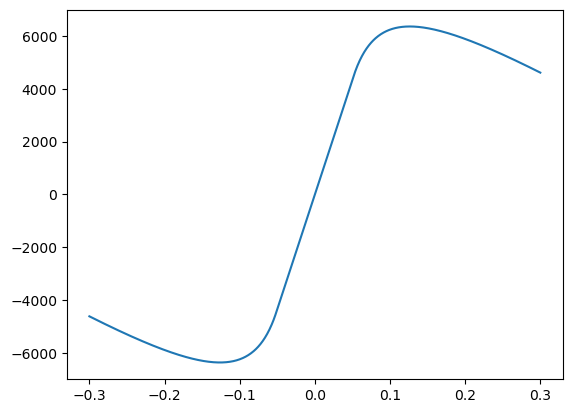

In [60]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Brush as br

SX = np.linspace(0,1,1000)
SY = np.linspace(0,0.3,1000)
Fy_params_alt = [1.58991258e+00, 1.05121281e+06, 5.74790914e-02]
F = br.brush_lat(SY, 4000 ,*Fy_params_alt)
plt.plot(SY,F)

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


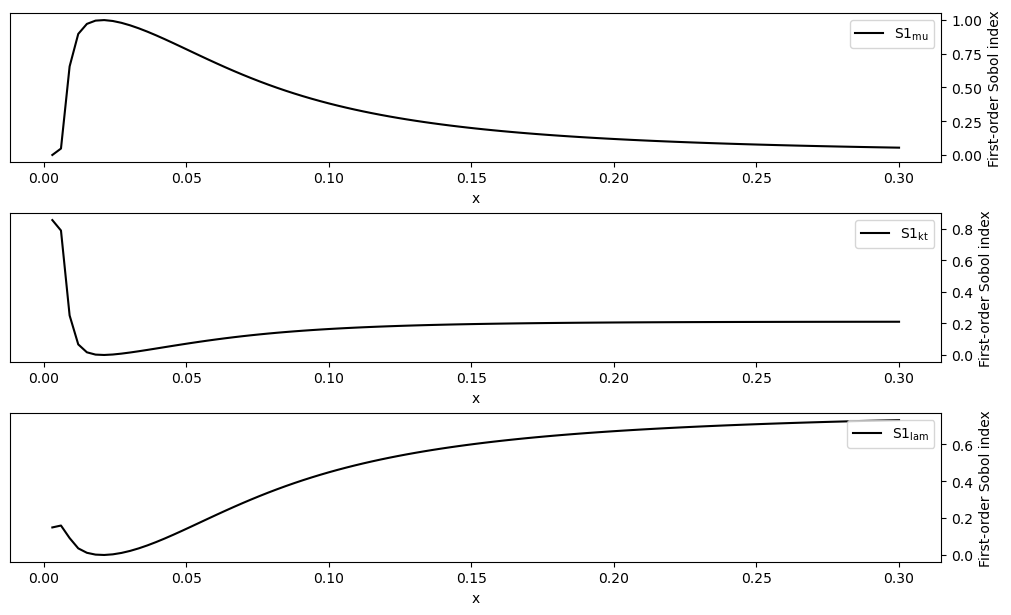

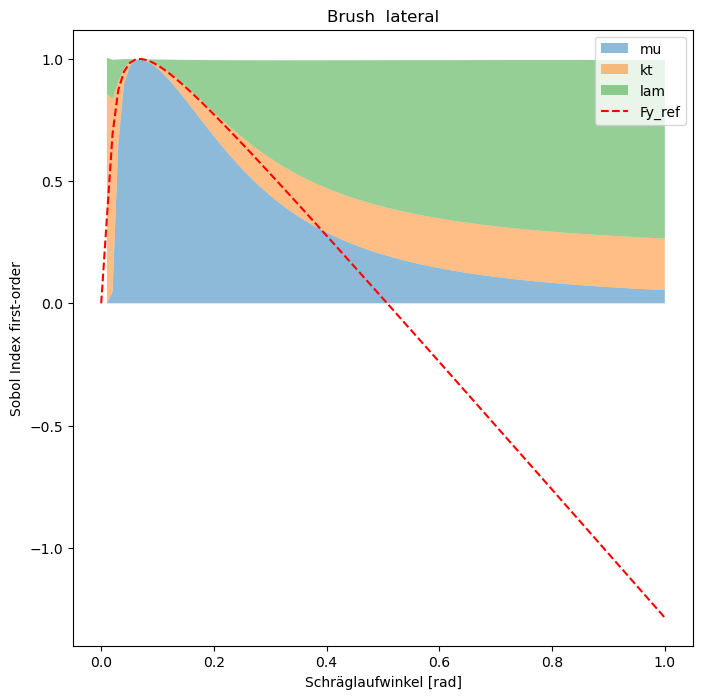

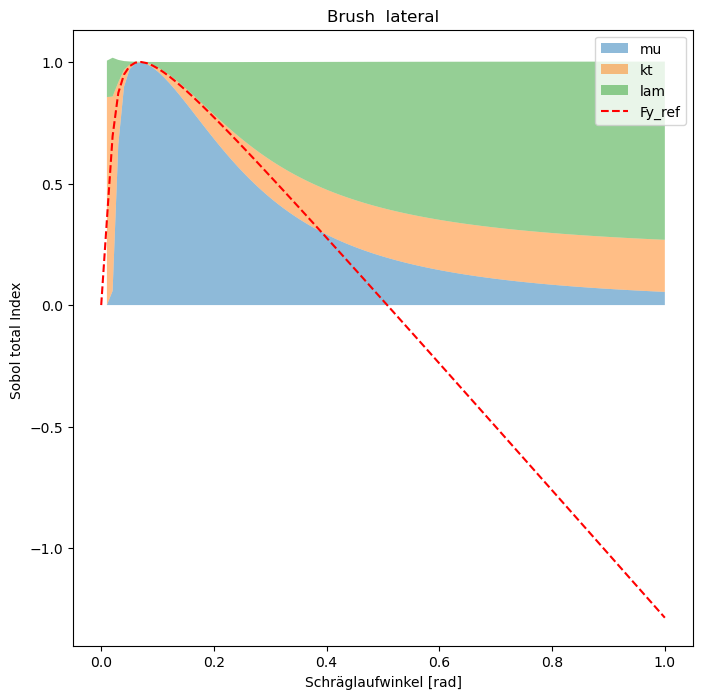

In [67]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Brush as br

SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fy_params_alt = [1.62226391e+00, 3.76873524e+06, 3.01234983e-02]
F_ref = br.brush_long(SX,4000, *Fy_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 3,
    'names': [ 'mu', 'kt', 'lam'],
    'bounds': [[1.62226391e+00 *(1-s),1.62226391e+00*(1+s)], [3.76873524e+06*(1-s), 3.76873524e+06*(1+s)], 
               [3.01234983e-02*(1-s), 3.01234983e-02*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SX=SX):
    y = np.zeros((ab.shape[0], SX.shape[0]))
    for i, (mu, kt, lam) in enumerate(ab):
        y[i,:] = br.brush_long(SX,4000,mu,kt,lam)

    return y

(
sp.sample_sobol(2**8) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
# mu, kt, lam
S1s_mu  = np.array(S1s[:,0])
S1s_kt  = np.array(S1s[:,1])
S1s_lam  = np.array(S1s[:,2])

S1s_kt_plt = np.array([x+y for x,y in zip(S1s_mu,S1s_kt)])
S1s_lam_plt = np.array([x+y for x,y in zip(S1s_kt_plt,S1s_lam)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SX,S1s_mu,0, alpha=0.5, label = 'mu') #alpha = deckkraft farbe
plt.fill_between(SX,S1s_mu,S1s_kt_plt, where = (S1s_kt_plt > S1s_mu), alpha=0.5, label = 'kt')
plt.fill_between(SX,S1s_kt_plt,S1s_lam_plt, where = (S1s_lam_plt > S1s_kt_plt), alpha=0.5, label = 'lam')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol Index first-order')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fy_ref')
plt.title('Brush  long')
plt.legend(loc='upper right')
plt.show()

STs_mu  = np.array(STs[:,0])
STs_kt  = np.array(STs[:,1])
STs_lam  = np.array(STs[:,2])

STs_kt_plt = np.array([x+y for x,y in zip(STs_mu,STs_kt)])
STs_lam_plt = np.array([x+y for x,y in zip(STs_kt_plt,STs_lam)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SX,STs_mu,0, alpha=0.5, label = 'mu') #alpha = deckkraft farbe
plt.fill_between(SX,STs_mu,STs_kt_plt, where = (STs_kt_plt > STs_mu), alpha=0.5, label = 'kt')
plt.fill_between(SX,STs_kt_plt,STs_lam_plt, where = (STs_lam_plt > STs_kt_plt), alpha=0.5, label = 'lam')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Brush  long')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fy_ref')
plt.legend(loc='upper right')
plt.show()

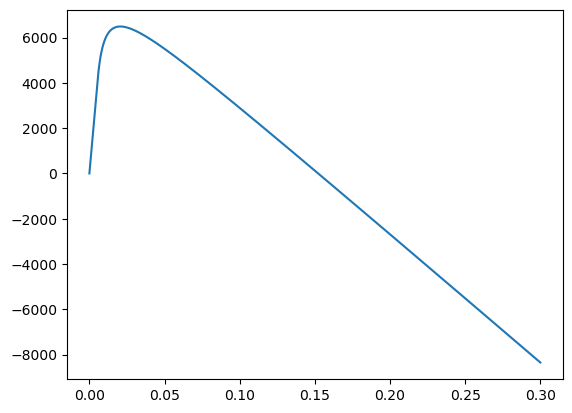

In [66]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Brush as br

SX = np.linspace(0,1,1000)
SY = np.linspace(0,0.3,1000)
Fy_params_alt = [1.62226391e+00, 3.76873524e+06, 3.01234983e-02]
F = br.brush_long(SX,4000, *Fy_params_alt)
plt.plot(SY,F)

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


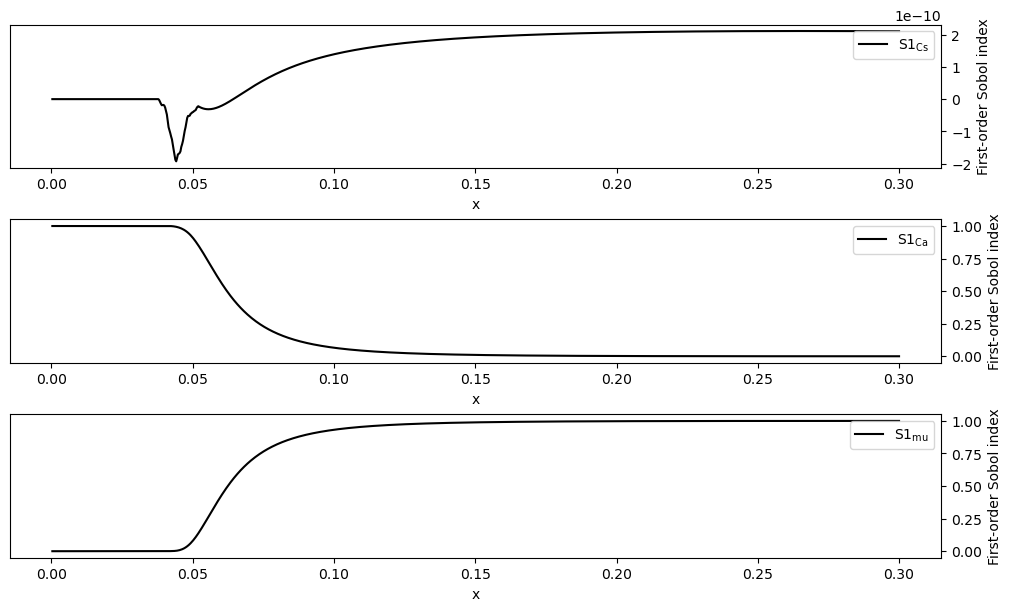

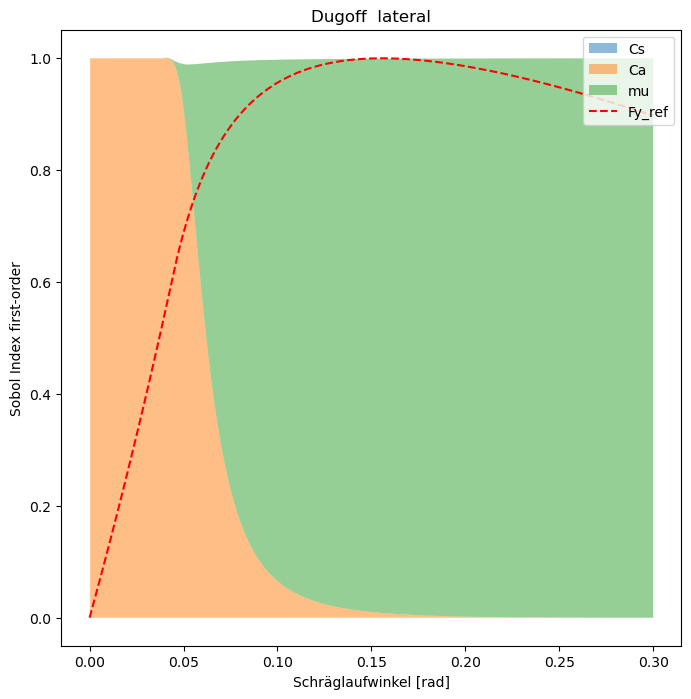

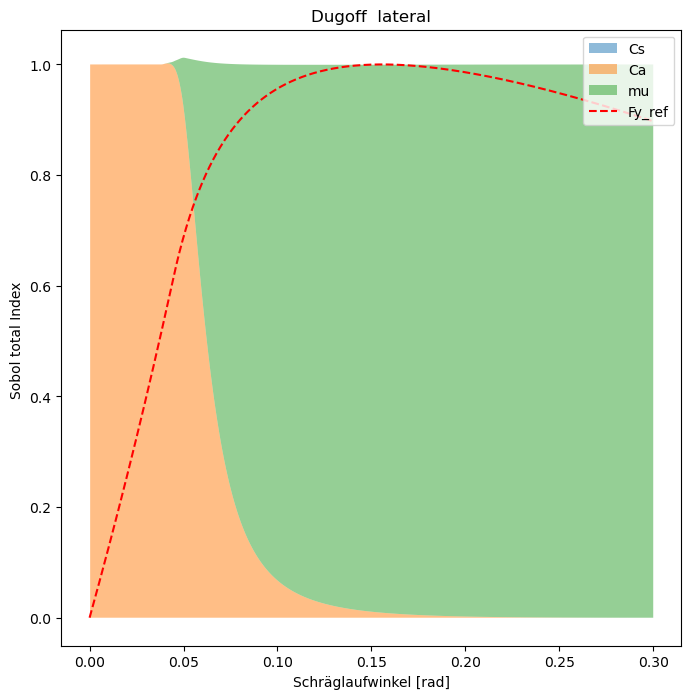

In [72]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Dugoff as du

SX = np.linspace(0,1,1000)
SY = np.linspace(0,0.3,1000)
Fy_params_alt = [1.94120979e-01,  4.07519670e+03,  1.42305583e-01]
F_ref = du.dugoff_lat(SX,SY,3000,*Fy_params_alt)

F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 3,
    'names': [ 'Cs','Ca','mu'],
    'bounds': [[1.94120979e-01 *(1-s),1.94120979e-01*(1+s)], [4.07519670e+03*(1-s), 4.07519670e+03*(1+s)], 
               [1.42305583e-01*(1-s), 1.42305583e-01*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (Cs,Ca,mu) in enumerate(ab):
        y[i,:] = du.dugoff_lat(SX,SY,3000,Cs,Ca,mu)

    return y

(
sp.sample_sobol(2**8) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
# Cs,Ca,mu
S1s_Cs  = np.array(S1s[:,0])
S1s_Ca  = np.array(S1s[:,1])
S1s_mu  = np.array(S1s[:,2])

S1s_Ca_plt = np.array([x+y for x,y in zip(S1s_Cs,S1s_Ca)])
S1s_mu_plt = np.array([x+y for x,y in zip(S1s_Ca_plt,S1s_mu)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SY,S1s_Cs,0, alpha=0.5, label = 'Cs') #alpha = deckkraft farbe
plt.fill_between(SY,S1s_Cs,S1s_Ca_plt, where = (S1s_Ca_plt > S1s_Cs), alpha=0.5, label = 'Ca')
plt.fill_between(SY,S1s_Ca_plt,S1s_mu_plt, where = (S1s_mu_plt > S1s_Ca_plt), alpha=0.5, label = 'mu')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol Index first-order')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.title('Dugoff  lateral')
plt.legend(loc='upper right')
plt.show()

STs_Cs  = np.array(STs[:,0])
STs_Ca  = np.array(STs[:,1])
STs_mu  = np.array(STs[:,2])

STs_Ca_plt = np.array([x+y for x,y in zip(STs_Cs,STs_Ca)])
STs_mu_plt = np.array([x+y for x,y in zip(STs_Ca_plt,STs_mu)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SY,STs_Cs,0, alpha=0.5, label = 'Cs') #alpha = deckkraft farbe
plt.fill_between(SY,STs_Cs,STs_Ca_plt, where = (STs_Ca_plt > STs_Cs), alpha=0.5, label = 'Ca')
plt.fill_between(SY,STs_Ca_plt,STs_mu_plt, where = (STs_mu_plt > STs_Ca_plt), alpha=0.5, label = 'mu')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Dugoff  lateral')
plt.plot(SY,F_ref_plt, 'r--', label = 'Fy_ref')
plt.legend(loc='upper right')
plt.show()




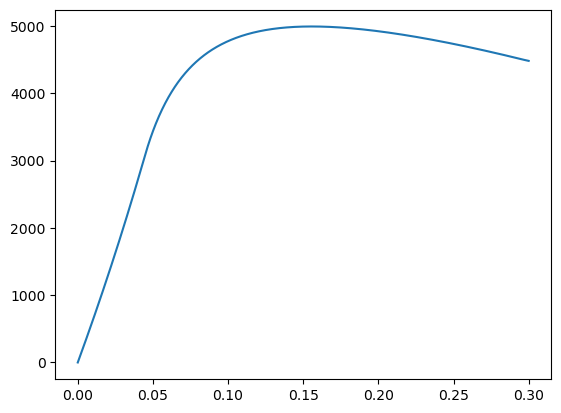

In [70]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Dugoff as du

SX = np.linspace(0,1,1000)
SY = np.linspace(0,0.3,1000)
Fy_params_alt = [1.94120979e-01,  4.07519670e+03,  1.42305583e-01]
F = du.dugoff_lat(SX,SY,3000,*Fy_params_alt)
plt.plot(SY,F)

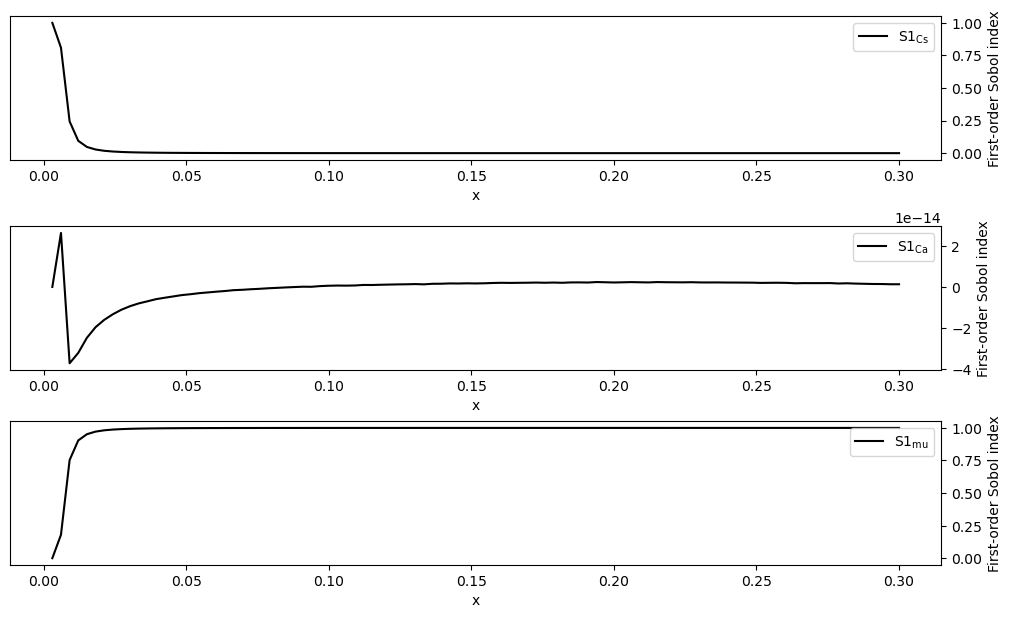

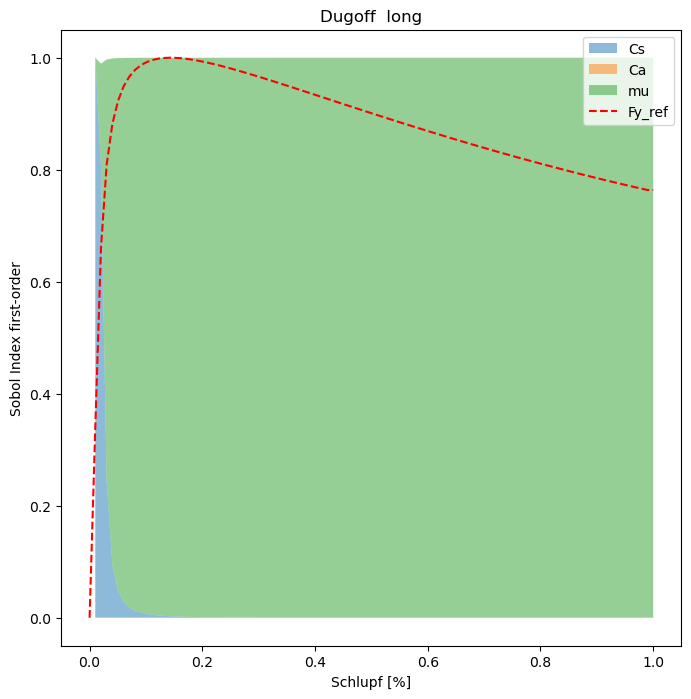

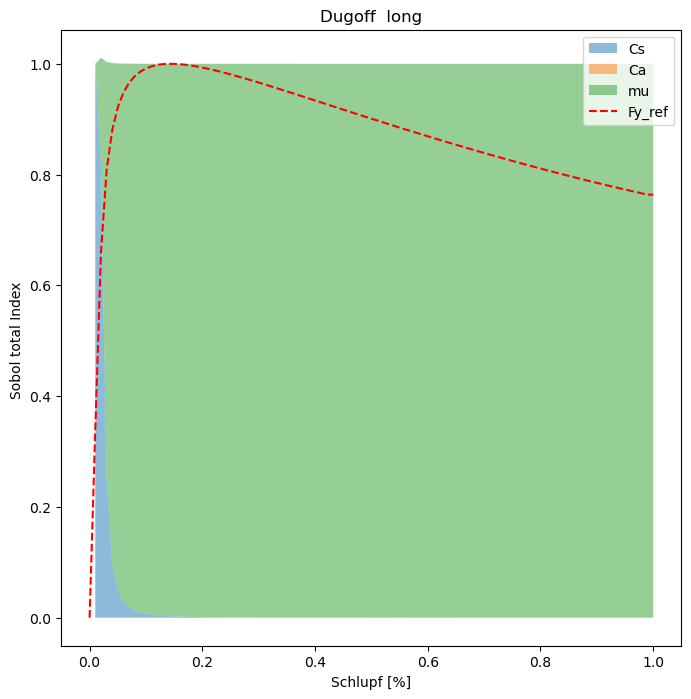

In [77]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Brush as br

SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fy_params_alt = [ 1.16724596e+05, -5.22466167e+00 , 1.30360646e+00]
F_ref = du.dugoff_long(SX,SY,3000,*Fy_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 3,
    'names': [ 'Cs','Ca','mu'],
    'bounds': [[1.16724596e+05 *(1-s),1.16724596e+05*(1+s)], [-5.22466167e+00*(1+s), -5.22466167e+00*(1-s)], 
               [1.30360646e+00*(1-s), 1.30360646e+00*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SX=SX):
    y = np.zeros((ab.shape[0], SX.shape[0]))
    for i, (Cs,Ca,mu) in enumerate(ab):
        y[i,:] = du.dugoff_long(SX,SY,3000,Cs,Ca,mu)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
# Cs,Ca,mu
S1s_Cs  = np.array(S1s[:,0])
S1s_Ca  = np.array(S1s[:,1])
S1s_mu  = np.array(S1s[:,2])

S1s_Ca_plt = np.array([x+y for x,y in zip(S1s_Cs,S1s_Ca)])
S1s_mu_plt = np.array([x+y for x,y in zip(S1s_Ca_plt,S1s_mu)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SX,S1s_Cs,0, alpha=0.5, label = 'Cs') #alpha = deckkraft farbe
plt.fill_between(SX,S1s_Cs,S1s_Ca_plt, where = (S1s_Ca_plt > S1s_Cs), alpha=0.5, label = 'Ca')
plt.fill_between(SX,S1s_Ca_plt,S1s_mu_plt, where = (S1s_mu_plt > S1s_Ca_plt), alpha=0.5, label = 'mu')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol Index first-order')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fy_ref')
plt.title('Dugoff  long')
plt.legend(loc='upper right')
plt.show()

STs_Cs  = np.array(STs[:,0])
STs_Ca  = np.array(STs[:,1])
STs_mu  = np.array(STs[:,2])

STs_Ca_plt = np.array([x+y for x,y in zip(STs_Cs,STs_Ca)])
STs_mu_plt = np.array([x+y for x,y in zip(STs_Ca_plt,STs_mu)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SX,STs_Cs,0, alpha=0.5, label = 'Cs') #alpha = deckkraft farbe
plt.fill_between(SX,STs_Cs,STs_Ca_plt, where = (STs_Ca_plt > STs_Cs), alpha=0.5, label = 'Ca')
plt.fill_between(SX,STs_Ca_plt,STs_mu_plt, where = (STs_mu_plt > STs_Ca_plt), alpha=0.5, label = 'mu')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol total Index ')
plt.title('Dugoff  long')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fy_ref')
plt.legend(loc='upper right')
plt.show()

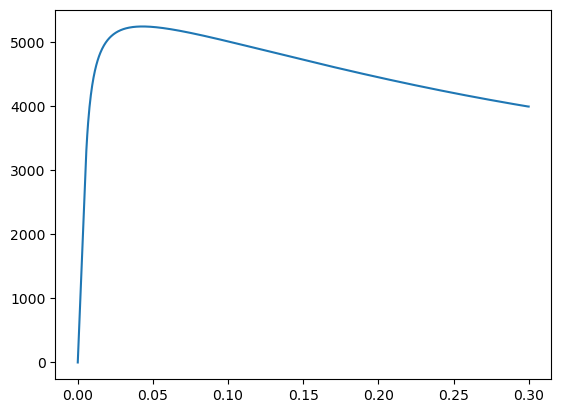

In [73]:
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Dugoff as du

SX = np.linspace(0,1,1000)
SY = np.linspace(0,0.3,1000)
Fy_params_alt = [ 1.16724596e+05, -5.22466167e+00 , 1.30360646e+00]
F = du.dugoff_long(SX,SY,3000,*Fy_params_alt)
plt.plot(SY,F)